# **IMPORTING REQUIRED LIBRARIES**

In [54]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.metrics import classification_report, confusion_matrix
import cufflinks as cf
cf.go_offline(connected=True)
init_notebook_mode(connected=True)

# **PREPROCESSING DATA**

In [4]:
#importing data from CSV file into pandas dataframe
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df = pd.read_csv("F:/Sem1/CS513/Final project/CreditFraud/application_data.csv")
df.shape

(307511, 122)

In [5]:
#Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
#dropping the columns that store the Normalized information about building where the client lives
MODE_cols = [col for col in df.columns if '_MODE' in col]
df.drop(columns = MODE_cols,inplace=True)
MEDI_cols = [col for col in df.columns if '_MEDI' in col]
df.drop(columns = MEDI_cols,inplace=True)
AVG_cols = [col for col in df.columns if '_AVG' in col]
df.drop(columns = AVG_cols,inplace=True)

In [9]:
#Find all the columns starting with name FLAG_DOCUMENT , as these are just FLAGS indicating document submission and can be dropped
temp=df.filter(regex='^FLAG_DOCUMENT',axis=1)

In [10]:
#drop the FLAG_DOCUMENT Columns the column names are stored in temp Series(all columns includes FLAGS)
df.drop(columns=temp.columns,inplace=True)

In [11]:
#These columns 'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL' 
#are FLAGS which need not be used in analysis so drop them
df.drop(columns=['FLAG_MOBIL',
                           'FLAG_EMP_PHONE',
                           'FLAG_WORK_PHONE',
                           'FLAG_CONT_MOBILE',
                           'FLAG_PHONE',
                            'FLAG_EMAIL'],inplace=True)

In [12]:
#Percentage of null values in each column
df.isnull().sum().sort_values(ascending=False)

OWN_CAR_AGE                    202929
EXT_SOURCE_1                   173378
OCCUPATION_TYPE                 96391
EXT_SOURCE_3                    60965
AMT_REQ_CREDIT_BUREAU_YEAR      41519
AMT_REQ_CREDIT_BUREAU_QRT       41519
AMT_REQ_CREDIT_BUREAU_MON       41519
AMT_REQ_CREDIT_BUREAU_WEEK      41519
AMT_REQ_CREDIT_BUREAU_DAY       41519
AMT_REQ_CREDIT_BUREAU_HOUR      41519
NAME_TYPE_SUITE                  1292
OBS_30_CNT_SOCIAL_CIRCLE         1021
DEF_30_CNT_SOCIAL_CIRCLE         1021
OBS_60_CNT_SOCIAL_CIRCLE         1021
DEF_60_CNT_SOCIAL_CIRCLE         1021
EXT_SOURCE_2                      660
AMT_GOODS_PRICE                   278
AMT_ANNUITY                        12
CNT_FAM_MEMBERS                     2
DAYS_LAST_PHONE_CHANGE              1
REG_REGION_NOT_LIVE_REGION          0
ORGANIZATION_TYPE                   0
LIVE_CITY_NOT_WORK_CITY             0
REG_CITY_NOT_WORK_CITY              0
REG_CITY_NOT_LIVE_CITY              0
LIVE_REGION_NOT_WORK_REGION         0
REG_REGION_N

In [13]:
#Percentage of null values in each column
col_with_nullvalues=df.isnull().sum()/len(df)*100
col_with_nullvalues.sort_values(ascending=False)

OWN_CAR_AGE                    65.990810
EXT_SOURCE_1                   56.381073
OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
REG_REGION_NOT_LIVE_REGION      0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIV

In [14]:
# List the columns having more than 50% missing values
nullvalues_50=col_with_nullvalues[col_with_nullvalues.values>50.0].sort_values(ascending=False)
nullvalues_50

OWN_CAR_AGE     65.990810
EXT_SOURCE_1    56.381073
dtype: float64

In [17]:
df.drop(['OWN_CAR_AGE'] , axis = 1, inplace = True)
df.shape

(307511, 48)

In [18]:
# Checking the columns having less null percentage
df.isnull().sum()/len(df)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CL

In [19]:
# columns with int64 data types have 2 unique values and are flags
#these columns cannot be used in bivariate analysis as they are not categorical.
df.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
dtype: int64

In [20]:
# we need to drop other columns which we dont need
df.drop(columns = ['REG_REGION_NOT_LIVE_REGION',
                             'REG_REGION_NOT_WORK_REGION',
                             'LIVE_REGION_NOT_WORK_REGION',
                             'REG_CITY_NOT_LIVE_CITY',
                             'REG_CITY_NOT_WORK_CITY',
                            'LIVE_CITY_NOT_WORK_CITY'],inplace=True)
df.shape

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [23]:
#Sanity Check for columns and converting the negative values to positive values
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
df['DAYS_ID_PUBLISH'] = abs(df['DAYS_ID_PUBLISH'])
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])
df['DAYS_REGISTRATION'] = abs(df['DAYS_REGISTRATION'])
df['DAYS_LAST_PHONE_CHANGE'] = abs(df['DAYS_LAST_PHONE_CHANGE'])
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,School,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,Government,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,WEDNESDAY,17,Business Entity Type 3,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,Religion,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Get the count,size and unique values in each column of application data
df.agg(['count','size','nunique'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,307233,306219,307511,307511,307511,307511,307511,307511,307511,307511,307511,211120,307509,307511,307511,307511,307511,307511,134133,306851,246546,306490,306490,306490,306490,307510,265992,265992,265992,265992,265992,265992
size,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
nunique,307511,2,2,3,2,2,15,2548,5603,13672,1002,7,8,5,6,6,81,17460,12574,15688,6168,18,17,3,3,7,24,58,114584,119831,814,33,10,33,9,3773,5,9,9,24,11,25


In [25]:
#Checking the distribution of target variable
defaulters=df[df.TARGET==1]
nondefaulters=df[df.TARGET==0]
print(len(defaulters))
print(len(nondefaulters))

24825
282686


In [26]:
#checking percentage of defaulters
percentage_defaulters=(len(defaulters)*100)/len(df)
percentage_defaulters

8.072881945686495

In [27]:
#checking percentage of non-defaulters
percentage_nondefaulters=(len(nondefaulters)*100)/len(df)
percentage_nondefaulters

91.92711805431351

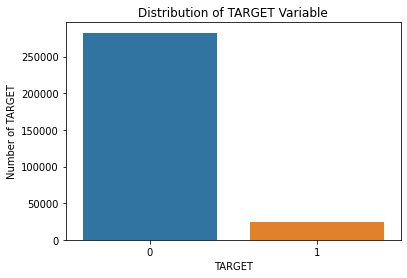

In [28]:
sns.countplot(df.TARGET)
plt.xlabel("TARGET")
plt.ylabel("Number of TARGET")
plt.title("Distribution of TARGET Variable")
plt.show()

In [29]:
#Looking at the data types of the columns considered for analysis
df.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [30]:
df.select_dtypes('float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [31]:
df.select_dtypes('int64').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START'],
      dtype='object')

In [32]:
defaulters=df[df.TARGET==1]
nondefaulters=df[df.TARGET==0]

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

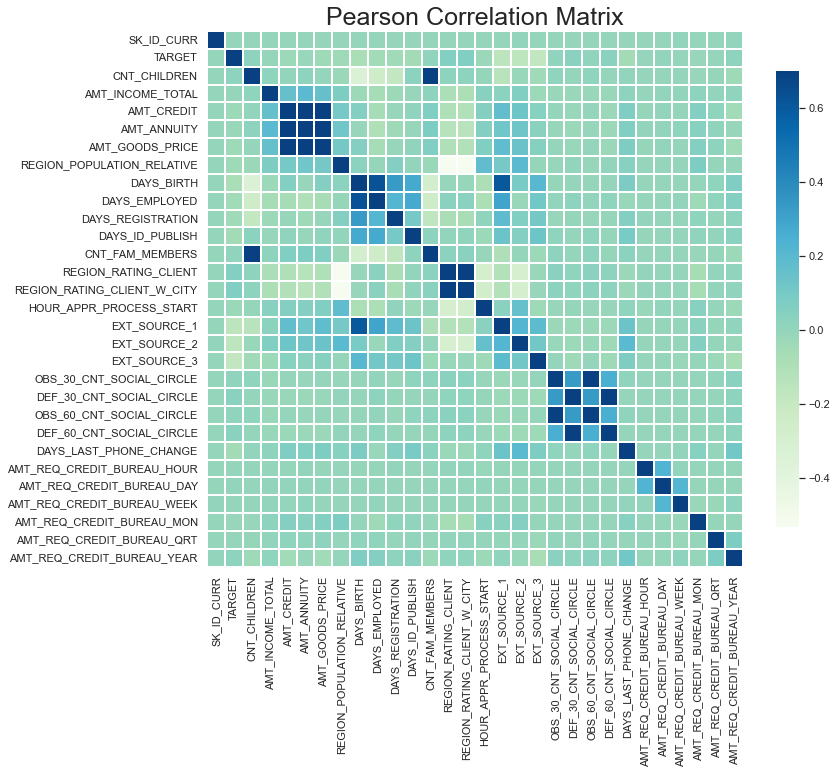

In [35]:
#correlation matrix to see on which columns TARGET is most dependent
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(12,12))
plt.title('Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=False, cbar_kws={"shrink": .7})

In [36]:
df.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,0.001500,0.001369,0.000973,0.000384,-0.002895,-0.001075,-0.001138,0.000350,0.000082,0.002342,0.000222,-0.001409,-0.000082,-0.001423,0.001187,0.000858,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,-0.078239,-0.047046,-0.041975,-0.051457,0.009308,0.058899,0.060893,-0.024166,-0.155317,-0.160472,-0.178919,0.009131,0.032248,0.009022,0.031276,-0.055218,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,-0.330938,-0.241583,-0.183395,0.028019,0.879161,0.025423,0.024781,-0.007292,-0.138470,-0.018015,-0.042710,0.015593,-0.001262,0.015232,-0.001861,0.005865,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,-0.027261,-0.063835,-0.027805,-0.008506,0.016342,-0.085465,-0.091735,0.036459,0.026232,0.060925,-0.030229,-0.013099,-0.013244,-0.013015,-0.013135,0.018585,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,0.055436,-0.064319,-0.009621,0.006575,0.063160,-0.101776,-0.110915,0.052738,0.168429,0.131228,0.043516,0.000190,-0.021229,0.000239,-0.023767,0.073701,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
AMT_ANNUITY,-0.000433,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,-0.009445,-0.102851,-0.038514,-0.011268,0.075539,-0.128525,-0.141682,0.052269,0.119398,0.125804,0.030752,-0.011987,-0.022833,-0.011731,-0.024001,0.063747,0.003861,0.002185,0.013881,0.039148,0.010124,-0.011320
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.001827,0.159610,0.986968,0.775109,1.000000,0.103520,0.053442,-0.062265,-0.011565,0.009267,0.061185,-0.103786,-0.112208,0.062320,0.175502,0.139367,0.047717,0.000328,-0.022244,0.000347,-0.024506,0.076313,-0.003237,0.004677,-0.001007,0.056422,0.016432,-0.050998
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118429,0.103520,1.000000,0.029582,-0.004094,0.053820,0.003993,-0.024209,-0.532877,-0.531535,0.171285,0.099997,0.198924,-0.006001,-0.011160,0.006329,-0.010638,0.002404,0.044013,-0.002225,0.001399,-0.002149,0.078607,-0.001279,0.001003
DAYS_BIRTH,0.001500,-0.078239,-0.330938,-0.027261,0.055436,-0.009445,0.053442,0.029582,1.000000,0.623941,0.331912,0.272691,-0.278894,-0.009361,-0.008073,-0.091064,0.600610,0.091996,0.205478,-0.007425,-0.000206,-0.007023,-0.001925,0.082939,-0.005285,-0.002255,0.001336,-0.001372,0.011799,0.071983
DAYS_EMPLOYED,0.001369,-0.047046,-0.241583,-0.063835,-0.064319,-0.102851,-0.062265,-0.004094,0.623941,1.000000,0.214573,0.274842,-0.234365,0.033046,0.034880,-0.091641,0.298683,-0.018228,0.117088,0.005788,0.016460,0.005943,0.013911,-0.019159,-0.004722,0.000414,0.003012,-0.033753,0.015155,0.050002


In [38]:
#factorizing columns which have type of Object
#changing Object type columns into float and int
df['NAME_CONTRACT_TYPE'], uniques_NAME_CONTRACT_TYPE = pd.factorize(df['NAME_CONTRACT_TYPE'])
df['CODE_GENDER'], uniques_NAME_CONTRACT_TYPE = pd.factorize(df['CODE_GENDER'])
df['FLAG_OWN_CAR'], uniques_NAME_CONTRACT_TYPE = pd.factorize(df['FLAG_OWN_CAR'])
df['FLAG_OWN_REALTY'], uniques_NAME_CONTRACT_TYPE = pd.factorize(df['FLAG_OWN_REALTY'])
df['NAME_TYPE_SUITE'], uniques_NAME_CONTRACT_TYPE = pd.factorize(df['NAME_TYPE_SUITE'])
df['NAME_INCOME_TYPE'], uniques_NAME_CONTRACT_TYPE = pd.factorize(df['NAME_INCOME_TYPE'])
df['NAME_EDUCATION_TYPE'], uniques_NAME_CONTRACT_TYPE = pd.factorize(df['NAME_EDUCATION_TYPE'])
df['NAME_FAMILY_STATUS'], uniques_NAME_CONTRACT_TYPE = pd.factorize(df['NAME_FAMILY_STATUS'])
df['NAME_HOUSING_TYPE'], uniques_NAME_CONTRACT_TYPE = pd.factorize(df['NAME_HOUSING_TYPE'])
df['OCCUPATION_TYPE'], uniques_NAME_CONTRACT_TYPE = pd.factorize(df['OCCUPATION_TYPE'])
df['WEEKDAY_APPR_PROCESS_START'], uniques_NAME_CONTRACT_TYPE = pd.factorize(df['WEEKDAY_APPR_PROCESS_START'])
df['ORGANIZATION_TYPE'], uniques_NAME_CONTRACT_TYPE = pd.factorize(df['ORGANIZATION_TYPE'])
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0,0,0,0,0,0.018801,9461,637,3648.0,2120,0,1.0,2,2,0,10,0,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,1,1,1,1,0,0.003541,16765,1188,1186.0,291,1,2.0,1,1,1,11,1,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,135000.0,0,0,0,0,0,0.010032,19046,225,4260.0,2531,0,1.0,2,2,1,9,2,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,0,0,0,2,0,0.008019,19005,3039,9833.0,2437,0,2.0,2,2,0,17,0,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,0,0,0,0,0,0.028663,19932,3038,4311.0,3458,1,1.0,2,2,2,11,3,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

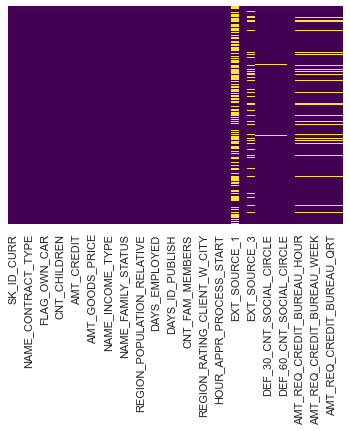

In [39]:
#checking whether dataset contains any null or NaN values 
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [40]:
#to see which columns in entire dataset having NaN values
df.isna().any()[lambda x: x]

AMT_ANNUITY                   True
AMT_GOODS_PRICE               True
CNT_FAM_MEMBERS               True
EXT_SOURCE_1                  True
EXT_SOURCE_2                  True
EXT_SOURCE_3                  True
OBS_30_CNT_SOCIAL_CIRCLE      True
DEF_30_CNT_SOCIAL_CIRCLE      True
OBS_60_CNT_SOCIAL_CIRCLE      True
DEF_60_CNT_SOCIAL_CIRCLE      True
DAYS_LAST_PHONE_CHANGE        True
AMT_REQ_CREDIT_BUREAU_HOUR    True
AMT_REQ_CREDIT_BUREAU_DAY     True
AMT_REQ_CREDIT_BUREAU_WEEK    True
AMT_REQ_CREDIT_BUREAU_MON     True
AMT_REQ_CREDIT_BUREAU_QRT     True
AMT_REQ_CREDIT_BUREAU_YEAR    True
dtype: bool

In [41]:
#replacing all the values of NaN with median value of that columns
cols_to_remove_NaN = ['AMT_ANNUITY',"AMT_GOODS_PRICE",'CNT_FAM_MEMBERS','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE',"DEF_30_CNT_SOCIAL_CIRCLE",'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for col in cols_to_remove_NaN:
    df[col] = df[col].replace(np.NaN,df[col].median())

In [44]:
#before we scale our data we need to remove column of ID which is not be used in prediction
df.drop(columns=['SK_ID_CURR'],inplace=True)

In [46]:
df.shape

(307511, 41)

# **NORMALIZING ALL THE COLUMNS DATA USING SCALER**

In [47]:
scaler = StandardScaler()
scaler.fit(df.drop('TARGET',axis = 1))
scaled_features = scaler.transform(df.drop('TARGET', axis = 1))
scaled_features

array([[-0.32439532, -1.38813546, -0.71791354, ..., -0.26994654,
        -0.30861959, -0.44092567],
       [-0.32439532,  0.72030748, -0.71791354, ..., -0.26994654,
        -0.30861959, -1.00733095],
       [ 3.08265852, -1.38813546,  1.39292539, ..., -0.26994654,
        -0.30861959, -1.00733095],
       ...,
       [-0.32439532,  0.72030748, -0.71791354, ...,  0.89717516,
        -0.30861959, -0.44092567],
       [-0.32439532,  0.72030748, -0.71791354, ..., -0.26994654,
        -0.30861959, -1.00733095],
       [-0.32439532,  0.72030748, -0.71791354, ...,  2.06429685,
        -0.30861959, -0.44092567]])

In [48]:
df_feat = pd.DataFrame(scaled_features, columns= df.columns[:-1])

In [49]:
df_feat.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
0,-0.324395,-1.388135,-0.717914,-0.664531,-0.577538,0.142129,-0.478095,-0.166143,-0.507236,-0.375466,-0.889689,-0.570906,-1.26454,-0.329911,-0.149452,-1.506880,-0.481110,-0.379837,-0.579154,-1.201145,-1.265722,-0.103064,-0.062699,-1.368578,-0.631821,-0.880189,-3.021877,-1.317940,-2.153651,0.242861,4.163504,0.252132,5.253260,0.206992,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.440926
1,-0.324395,0.720307,-0.717914,1.504820,-0.577538,0.426792,1.725450,0.592683,1.600873,0.838228,-0.063874,1.061891,-0.25013,-0.329911,-1.252750,0.166821,-0.477159,-1.078697,-1.790855,-0.912672,-0.167638,-2.067573,-2.051813,-0.906581,-0.325620,-0.787990,-1.384737,0.564482,0.112063,-0.174085,-0.320480,-0.168527,-0.275663,-0.163107,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331
2,3.082659,-1.388135,1.392925,-0.664531,-0.577538,-0.427196,-1.152888,-1.404669,-1.092145,-0.375466,-0.889689,-0.570906,-1.26454,-0.329911,-0.783451,0.689509,-0.484065,-0.206116,-0.306869,-1.201145,-1.265722,-0.103064,-0.062699,-0.906581,-0.938022,-0.695790,0.012103,0.216948,1.223975,-0.591031,-0.320480,-0.589187,-0.275663,-0.178831,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331
3,-0.324395,0.720307,-0.717914,-0.664531,-0.577538,-0.142533,-0.711430,0.177874,-0.653463,-0.375466,-0.889689,-0.570906,0.76428,-0.329911,-0.928991,0.680114,-0.463885,1.375829,-0.369143,-1.201145,-0.167638,-0.103064,-0.062699,-1.368578,1.511587,-0.880189,0.012103,0.712205,0.112063,0.242861,-0.320480,0.252132,-0.275663,-0.418306,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.440926
4,-0.324395,-1.388135,-0.717914,-0.664531,-0.577538,-0.199466,-0.213734,-0.361749,-0.068554,-0.375466,-0.889689,-0.570906,-1.26454,-0.329911,0.563570,0.892535,-0.463892,-0.191639,0.307263,-0.912672,-1.265722,-0.103064,-0.062699,-0.444584,-0.325620,-0.603590,0.012103,-1.004691,0.112063,-0.591031,-0.320480,-0.589187,-0.275663,0.173126,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331


# **SPLITING DATASET FOR TRAINING AND TESTING**

In [50]:
X = df_feat
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# **KNN ALGORITHM**

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [55]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[93159   203]
 [ 8048    69]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     93362
           1       0.25      0.01      0.02      8117

    accuracy                           0.92    101479
   macro avg       0.59      0.50      0.49    101479
weighted avg       0.87      0.92      0.88    101479



In [ ]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [57]:
error_rate

[0.1376935129435647,
 0.0860276510411021,
 0.09604942894589029,
 0.08248997329496743,
 0.08551522975196839,
 0.08110052326097025,
 0.08263778712837139,
 0.08060781048295707,
 0.08137644241665763,
 0.08037130834951074,
 0.0806275189940776,
 0.08015451472718493,
 0.08026291153834783,
 0.08008553493826309,
 0.08019393174942599,
 0.07999684663822071,
 0.08004611791602204,
 0.07998699238266045,
 0.0800559721715823,
 0.08000670089378098,
 0.08002640940490151,
 0.08001655514934124,
 0.08001655514934124,
 0.08000670089378098,
 0.0799771381271002,
 0.07999684663822071,
 0.07998699238266045,
 0.0799771381271002,
 0.08000670089378098,
 0.0799771381271002,
 0.07998699238266045,
 0.07998699238266045,
 0.0799771381271002,
 0.07999684663822071,
 0.07998699238266045,
 0.07998699238266045,
 0.07998699238266045,
 0.07998699238266045,
 0.07998699238266045]

Text(0, 0.5, 'Error Rate')

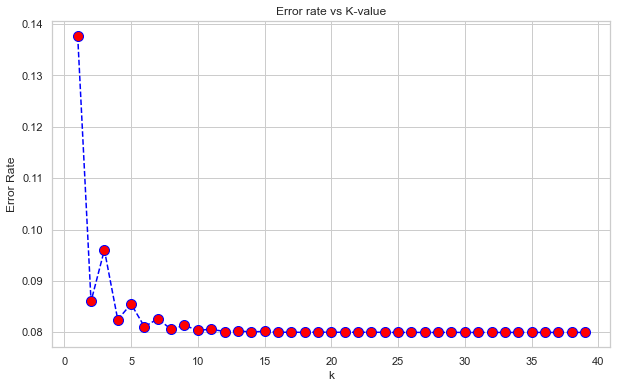

In [58]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate, color ='blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red',markersize = 10)
plt.title('Error rate vs K-value')
plt.xlabel('k')
plt.ylabel('Error Rate')